In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
from matplotlib import pyplot as plt
import math
from functools import partial

import bases
import generators
import representations
import reconstructions
import utils

In [2]:
def show_reconstruction_comparison(X, reconstructed_data):
    assert X.ndim == 2
    assert reconstructed_data.ndim == 2
    N, state_dim = X.shape
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    if state_dim == 1:
        axs[0].plot(X)
        axs[1].plot(reconstructed_data)
    elif state_dim == 2:
        axs[0].scatter(X[:,0], X[:,1], c=list(range(N)))
        axs[1].scatter(reconstructed_data[:,0], reconstructed_data[:,1], c=list(range(N)))
        axs[0].set_xlim(-1,7)
        axs[1].set_xlim(-1,7)

    axs[0].set_ylabel('original x')
    axs[0].set_xlabel('original y')
    axs[0].set_ylim(-1,7)

    axs[1].set_ylabel('reconstruction x')
    axs[1].set_xlabel('reconstruction y')
    axs[1].set_ylim(-1,7)

    # fig.colorbar(range(N))
    plt.show()
    return

def get_settings(ndim=1, num_col=2000, degree=10, combination=True):
    if ndim == 2:
        initial_state = (0, 0)
        Yr, Xr = utils.generate_krylov(generators.two_torus_evolution_function, generators.two_torus_observable_func, initial_state, num_col)
        utils.plot_torus(Yr)
    else:
        initial_state=0
        Yr, Xr = utils.generate_krylov(generators.angle_evolution, generators.unit_circle_observable_function, initial_state, num_col)
        utils.plot_complex_on_unit_circle(Yr)
    basis = partial(bases.fourier_basis, degree=degree, combinations=combination)
    return Xr, basis

def test_irrational_flow_eigenfunction(Ur, representation_func, basis):
    n_dim = Ur.shape[1]
    K, V, L = representation_func(Ur, basis=basis)
    Ph = lambda x: basis(x)@V
    eigenfunction_values = np.array([np.squeeze(Ph(d)) for d in np.linspace([0 for _ in range(n_dim)], [2*np.pi for _ in range(n_dim)])])
    N, r = eigenfunction_values.shape
    print(f"N: {N}, r: {r}")
    r = min(15, r)  # remove at the end
    n_col = 5
    n_row = math.ceil(r/n_col)
    fig, axs = plt.subplots(nrows=n_row, ncols=n_col, figsize=(3*n_col, 3*n_row))
    fig.suptitle("eigenfunction value evolution")
    for i in range(r):
        utils.set_subplot_complex_on_unit_circle(eigenfunction_values[:,i], axs[i//n_col, i%n_col])
    plt.show()
    return Ph, V, L

def compare_reconstructed_data(Ur, Ph, V, L, basis, is_print=False):
    W = np.linalg.inv(V)
    KM = reconstructions.get_koopman_modes(Ur, W, basis)
    Ph_val = Ph(Ur[0])
    reconstructed_data = np.array([np.squeeze(Ph_val @ np.diag(np.power(L, k)) @ KM) for k in range(Ur.shape[0])])
    if reconstructed_data.ndim == 1:
        reconstructed_data = np.expand_dims(reconstructed_data, axis=1)
    if is_print:
        print(f"KM {KM.shape}, Ph {Ph_val.shape}, L {L.shape}")
        print(f"reconstruction {reconstructed_data.shape}")
    show_reconstruction_comparison(Ur, reconstructed_data)
    return reconstructed_data

# Show eigenfunction evolution

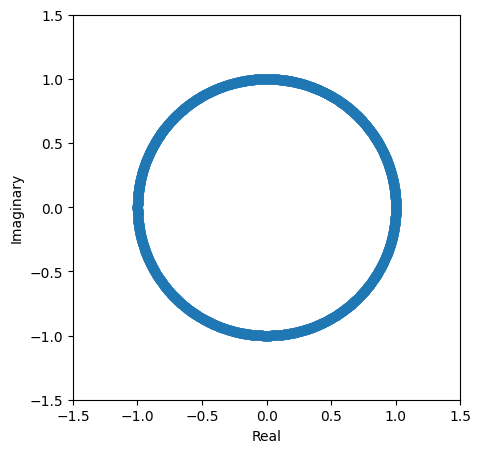

In [3]:
STATE_DIM = 1
Ur, basis = get_settings(ndim=STATE_DIM)

N: 50, r: 21


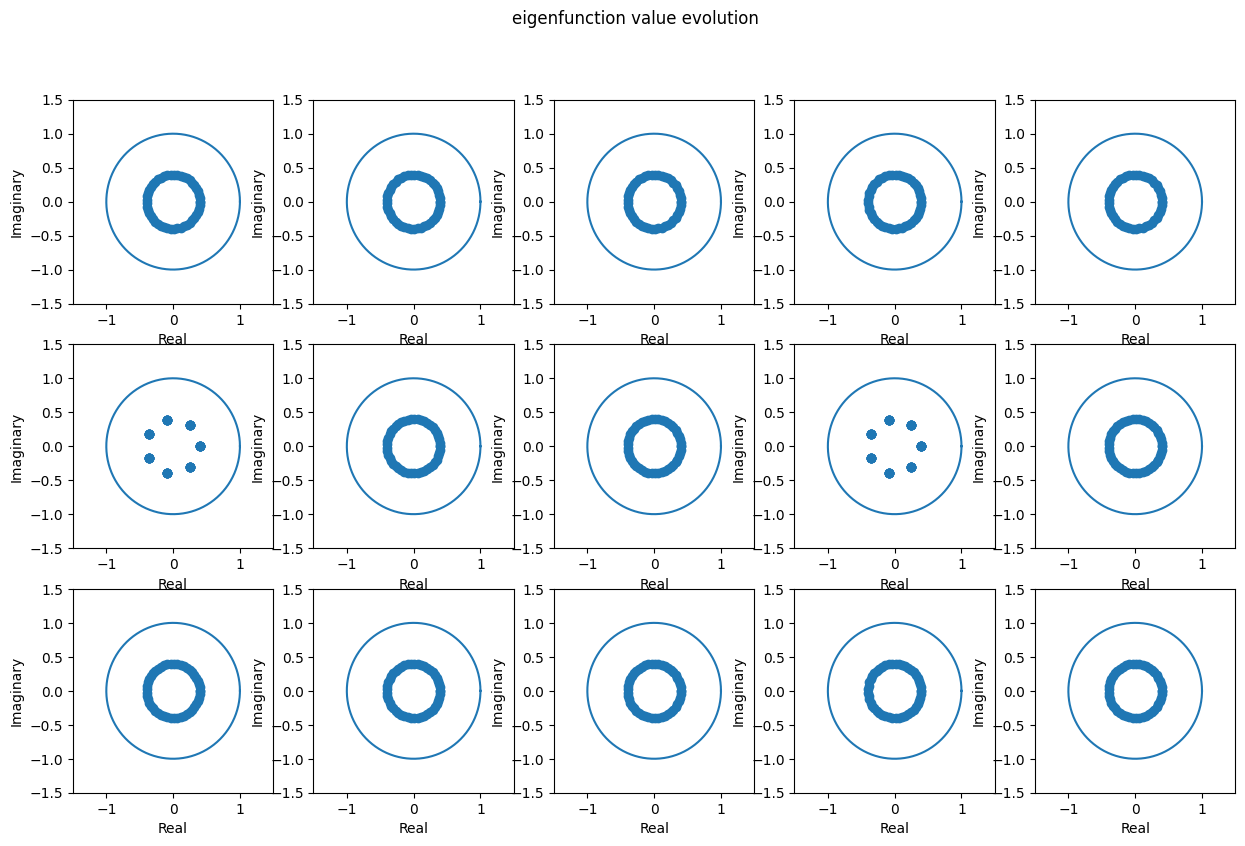

In [4]:
Ph1, V1, L1 = test_irrational_flow_eigenfunction(Ur, representations.EDMD_matrix_representation, basis)

N: 50, r: 21


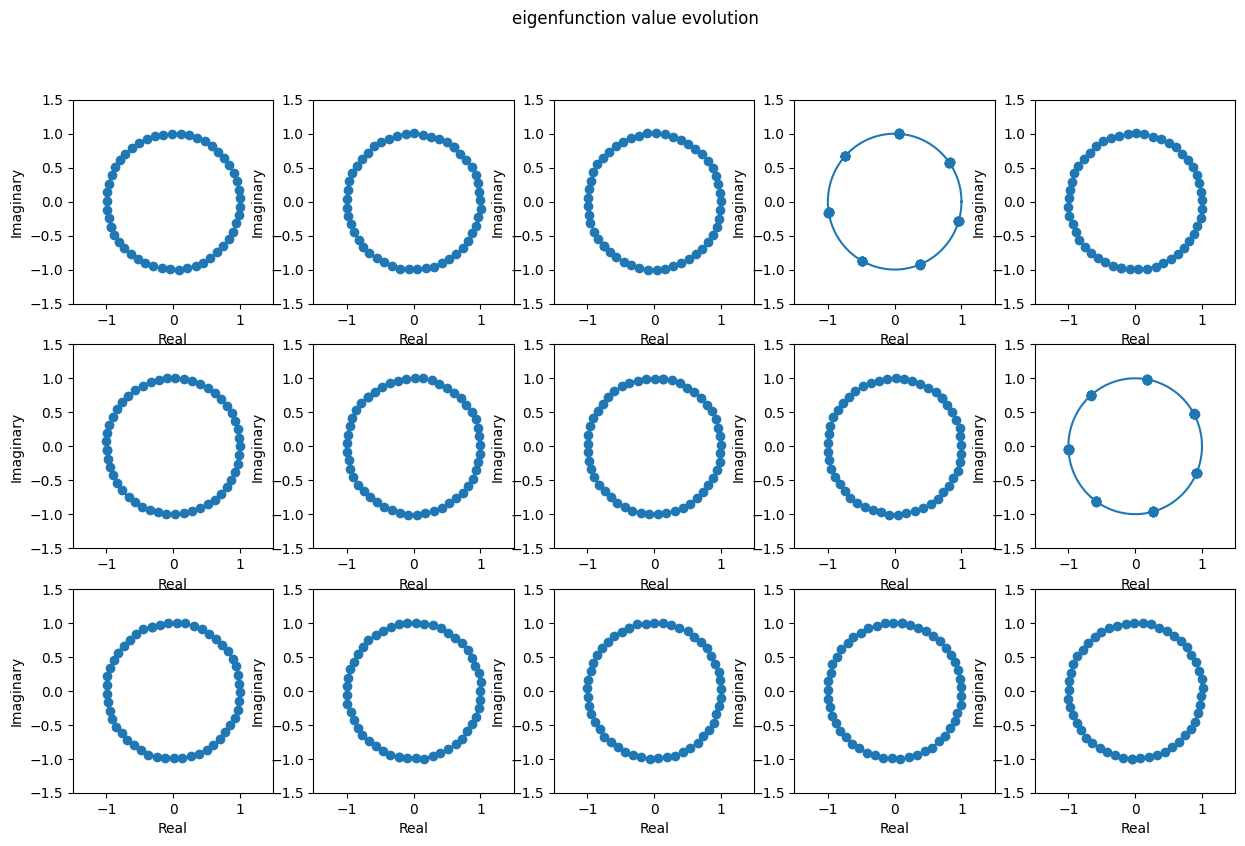

In [5]:
Ph2, V2, L2 = test_irrational_flow_eigenfunction(Ur, representations.mpEDMD_matrix_representation, basis)

# Data reconstruction check

/Users/hajime/workspace/tum/Master's Thesis/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


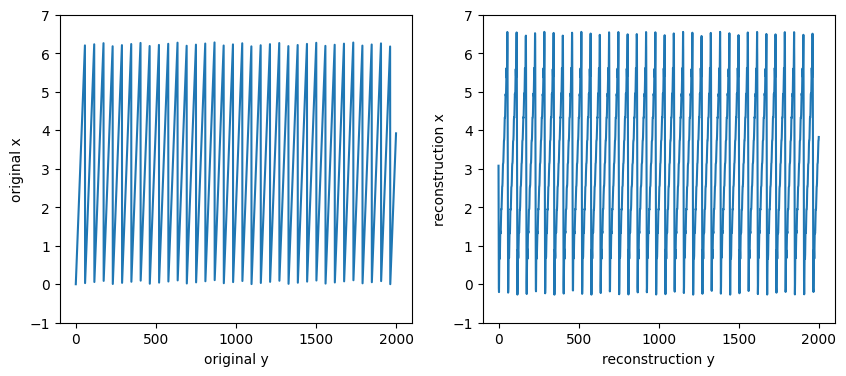

In [6]:
reconstructed_data1 = compare_reconstructed_data(Ur, Ph1, V1, L1, basis, is_print=False)

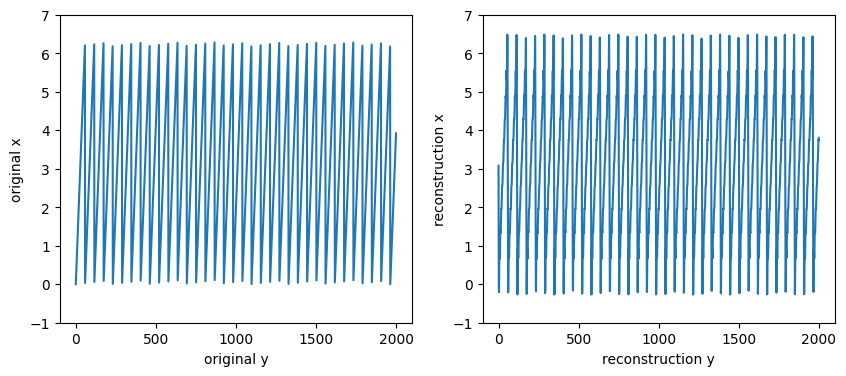

In [7]:
reconstructed_data2 = compare_reconstructed_data(Ur, Ph2, V2, L2, basis, is_print=False)